In [1]:
# %matplotlib notebook

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

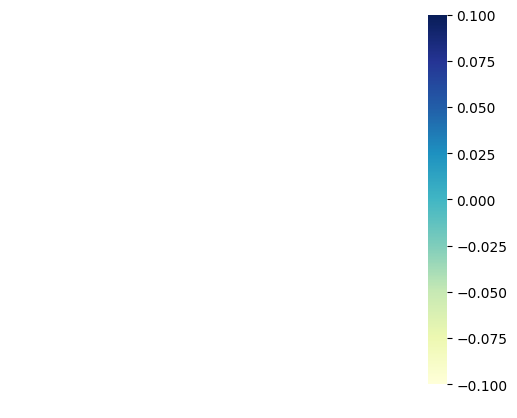

In [2]:
def generate_data(frame):
    data = np.random.rand(8, 8)
    map = sns.heatmap(data, cbar=True, ax=ax, square=True, cmap='YlGnBu')
    return map

fig, ax = plt.subplots()
heatmap = sns.heatmap(np.zeros((8, 8)), cbar=True, ax=ax, square=True, cmap='YlGnBu')

def init():
    # heatmap.set_data(np.zeros((8, 8)))
    # heatmap.set_array(np.zeros((8, 8)).ravel())
    return heatmap,

def update(frame):
    data = generate_data(frame)
    heatmap.set_data(data)
    ax.set_title(f"Frame {frame}")
    return heatmap,

ani = animation.FuncAnimation(
    fig, update, frames=range(100),
    init_func=init, blit=True
)

plt.show()
# ani.save('heatmap_animation.mp4', writer='ffmpeg')


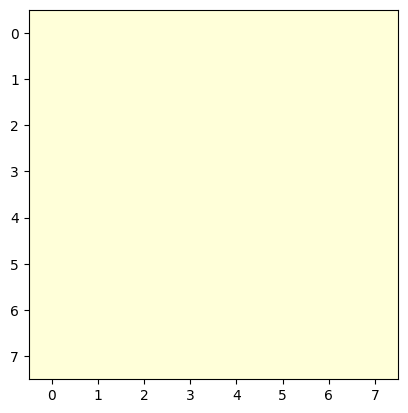

In [3]:
def generate_data(frame):
    # Example data: replace with your own logic
    return np.random.rand(8, 8)

fig, ax = plt.subplots()
data = np.zeros((8, 8))
cax = ax.imshow(data, cmap='YlGnBu', interpolation='nearest')

def init():
    cax.set_data(np.zeros((8, 8)))
    return cax,

def update(frame):
    data = generate_data(frame)
    cax.set_data(data)
    ax.set_title(f"Frame {frame}")
    return cax,

ani = animation.FuncAnimation(
    fig, update, frames=range(100),
    init_func=init, blit=True
)

plt.show()
# ani.save('heatmap_animation.mp4', writer='ffmpeg')